### 1.Import the necessary libraries and read the data.

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [4]:
a=pd.read_csv("fifa_ variable_information.csv")
a.T

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
unique id for every player,name,age,url to the player's photo,nationality,url to players's country flag,overall rating,potential rating,current club,url to club logo,current market value,...,rating on scale of 100,rating on scale of 100,rating on scale of 100,rating on scale of 100,rating on scale of 100,rating on scale of 100,rating on scale of 100,rating on scale of 100,rating on scale of 100,release clause value


In [6]:
data=pd.read_csv("fifa.csv")
data.head(2)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


### 2. Drop any columns that you deem unecessary for analysis.

In [7]:
data.drop(["Photo","Club Logo","Flag","Body Type","Work Rate","Loaned From"],axis=1,inplace=True)

In [8]:
pd.set_option("display.max_columns", None)
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,4.0,5.0,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [327]:
data.shape

(18207, 54)

### 3.The following columns need to be converted for further analysis:

In [328]:
### a.Value (string to float)

In [9]:
for i in data.index:
    if data["Value"][i][0]=="€":
         data["Value"][i]=data["Value"][i][1:]

In [10]:
data["Value"]=data["Value"].map(str) #converting some float values to string present in the data

In [11]:
for i in data.index:
    if data["Value"][i][-1]=="M":
        data["Value"][i]=float(data["Value"][i].replace("M",""))*1000000
    elif data["Value"][i][-1]=="K":
        data["Value"][i]=float(data["Value"][i].replace("K",""))*1000

In [12]:
data["Value"]=data["Value"].astype(np.number) #converting string to float

In [196]:
                          #### Value column converted ####

In [104]:
data.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,RF,10.0,2004.0,2021.0,5.70,159.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,ST,7.0,2018.0,2022.0,6.20,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,5.0,5.0,LW,10.0,2017.0,2022.0,5.90,150.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,3.0,1.0,GK,1.0,2011.0,2020.0,6.40,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,5.0,4.0,RCM,7.0,2015.0,2023.0,5.11,154.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,4.0,4.0,4.0,LF,10.0,2012.0,2020.0,5.80,163.0,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,4.0,4.0,4.0,RCM,10.0,2012.0,2020.0,5.80,146.0,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,Right,5.0,4.0,3.0,RS,9.0,2014.0,2021.0,6.00,190.0,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,4.0,3.0,3.0,RCB,15.0,2005.0,2020.0,6.00,181.0,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68000000.0,94000.0,Right,3.0,3.0,1.0,GK,1.0,2014.0,2021.0,6.20,192.0,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,16.0,43.0,60.0,67.0,86.0,49.0,22.0,76.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144500000.0


In [ ]:
## b.Wage

In [14]:
for i in data.index:
    if data["Wage"][i][0]=="€":
         data["Wage"][i]=data["Wage"][i][1:]

In [15]:
data["Wage"]=data["Wage"].map(str) #converting some float values to string present in the data

In [16]:
for i in data.index:
    if data["Wage"][i][-1]=="M":
        data["Wage"][i]=float(data["Wage"][i].replace("M",""))*1000000
    elif data["Wage"][i][-1]=="K":
        data["Wage"][i]=float(data["Wage"][i].replace("K",""))*1000

In [17]:
data["Wage"]=data["Wage"].astype(np.number)

In [ ]:
                            ### Wage column converted ###

In [ ]:
### c. Joined

In [18]:
data["Joined"]=data["Joined"].map(str)

In [19]:
for i in data.index:
    data["Joined"][i]=data["Joined"][i][7:].replace(" ","")
    

In [20]:
data["Joined"].replace("",np.nan,inplace=True)

In [21]:
data["Joined"]=data["Joined"].astype(np.number)

In [347]:
                         ##### Joined converted to year #####

In [ ]:
## Contract valid Until

In [22]:
data["Contract Valid Until"]=data["Contract Valid Until"].map(str)

In [23]:
for i in data.index:
    data["Contract Valid Until"][i]=data["Contract Valid Until"][i][len(data["Contract Valid Until"][i])-4:]

In [24]:
data["Contract Valid Until"].replace("n",np.nan,inplace=True)

In [25]:
data["Contract Valid Until"]=data["Contract Valid Until"].astype(np.number)

In [279]:
## Height

In [26]:
data["Height"]=data["Height"].map(str)

In [27]:
for i in data.index:
    data["Height"][i]=data["Height"][i].replace("'",".")

In [28]:
data["Height"]=data["Height"].astype(np.number)

In [ ]:
                         ###### Values converted for height ########

In [ ]:
### Weight

In [29]:
data["Weight"]=data["Weight"].map(str)

In [30]:
for i in data.index:
    data["Weight"][i]=data["Weight"][i].replace("lbs","")

In [31]:
data["Weight"]=data["Weight"].astype(np.number)

In [ ]:
                                ##### Weight converted ######

In [ ]:
#### Release clause

In [32]:
data["Release Clause"]=data["Release Clause"].map(str)

In [33]:
for i in data.index:
    if data["Release Clause"][i][0]=="€":
         data["Release Clause"][i]=data["Release Clause"][i][1:]

In [34]:
for i in data.index:
    if data["Release Clause"][i][-1]=="M":
        data["Release Clause"][i]=float(data["Release Clause"][i].replace("M",""))*1000000
    elif data["Release Clause"][i][-1]=="K":
        data["Release Clause"][i]=float(data["Release Clause"][i].replace("K",""))*1000

In [35]:
data["Release Clause"]=data["Release Clause"].astype(np.number)

In [ ]:
#### Release clause converted ##### 

In [58]:
data.to_csv("data.csv")

In [ ]:
data=pd.read_csv("data.csv")    #run while in new session

In [63]:
data.head(2)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,RF,10.0,2004.0,2021.0,5.7,159.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,ST,7.0,2018.0,2022.0,6.2,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0


In [51]:
data2=data.copy()

In [52]:
data2.to_csv("New_Data.csv")

In [57]:
100-(len(data2.dropna())/len(data2)*100) 

8.590102707749764

In [ ]:
## Approach 1

In [60]:
data2.dropna(inplace=True) # since there only less 10% nan rows we are dropping it

In [ ]:
## Approach 2

## 1.Plot the distribution of Overall rating for all players. 

In [96]:
a=data2.groupby("Name")["Overall"].mean()
print(data["Overall"].mode())

0    66
dtype: int64


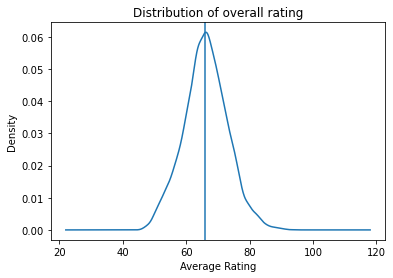

In [101]:
a.plot(kind="kde")
plt.axvline(66)
plt.xlabel("Average Rating")
plt.title("Distribution of overall rating")
plt.show()

## 2.Generate pair plots for the following variables: Overall, Value, Wage, International Reputation, Height, Weight, Release Clause


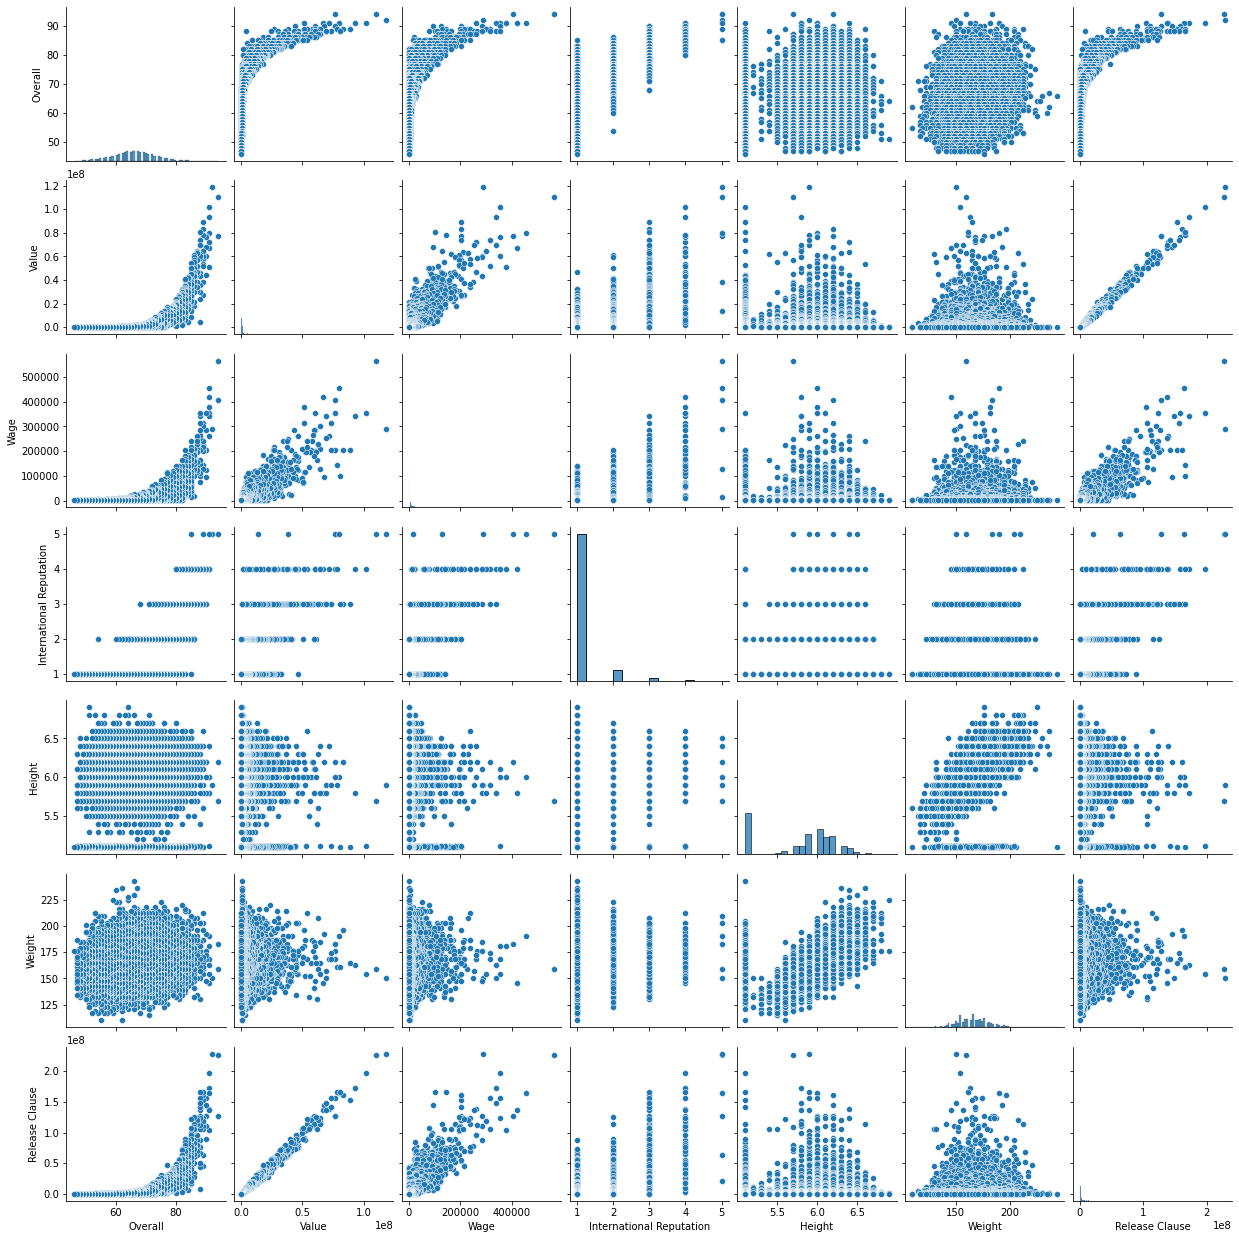

In [106]:
sns.pairplot(data2[["Overall",'Value','Wage','International Reputation',"Height","Weight","Release Clause"]])

## 3.Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020

In [118]:
data2["Contract Valid Until"]=data2["Contract Valid Until"].map(int)
data2["Joined"]=data2["Joined"].map(int)
data2020=data2[data2["Contract Valid Until"]==2020]
tab=data2020.sort_values(by="Overall",ascending=False).head(20)

In [458]:
tab.head(20)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,3.0,1.0,GK,1.0,2011,2020,6.40,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,4.0,4.0,4.0,RCM,10.0,2012,2020,5.80,146.0,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,4.0,3.0,3.0,RCB,15.0,2005,2020,6.00,181.0,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,4.0,4.0,4.0,LF,10.0,2012,2020,5.80,163.0,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
13,168542,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,Left,4.0,2.0,4.0,LCM,21.0,2010,2020,5.80,148.0,84.0,76.0,54.0,93.0,82.0,89.0,82.0,77.0,87.0,94.0,70.0,64.0,92.0,90.0,90.0,72.0,64.0,78.0,52.0,75.0,57.0,50.0,89.0,92.0,75.0,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0
21,179813,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,60000000.0,200000.0,Right,4.0,4.0,3.0,LS,21.0,2013,2020,6.10,170.0,70.0,89.0,89.0,78.0,90.0,80.0,77.0,76.0,52.0,82.0,75.0,76.0,77.0,91.0,59.0,87.0,88.0,92.0,78.0,79.0,84.0,48.0,93.0,77.0,85.0,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,4.0,3.0,2.0,LCB,3.0,2005,2020,6.20,187.0,58.0,33.0,83.0,59.0,45.0,58.0,60.0,31.0,59.0,57.0,63.0,75.0,54.0,82.0,55.0,78.0,89.0,65.0,89.0,49.0,92.0,88.0,28.0,50.0,50.0,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0
31,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,3.0,5.0,4.0,CAM,10.0,2013,2020,5.11,168.0,88.0,80.0,52.0,91.0,77.0,84.0,86.0,87.0,88.0,91.0,75.0,73.0,79.0,88.0,81.0,84.0,50.0,92.0,58.0,89.0,46.0,56.0,83.0,91.0,67.0,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
39,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,24000000.0,165000.0,Right,4.0,3.0,2.0,RCB,2.0,2012,2020,6.00,181.0,60.0,38.0,81.0,80.0,63.0,62.0,61.0,64.0,80.0,80.0,70.0,72.0,68.0,82.0,68.0,71.0,90.0,74.0,82.0,68.0,76.0,89.0,59.0,72.0,60.0,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44400000.0
50,175943,D. Mertens,31,Belgium,87,87,Napoli,45000000.0,135000.0,Right,3.0,4.0,4.0,RF,14.0,2013,2020,5.70,134.0,77.0,86.0,35.0,82.0,70.0,91.0,82.0,79.0,74.0,89.0,93.0,85.0,94.0,88.0,92.0,80.0,60.0,75.0,42.0,81.0,59.0,36.0,87.0,83.0,79.0,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76500000.0


### a)What would the average wage for this set of players be?

In [120]:
tab["Wage"].mean()

205450.0

### b)What is the average age?

In [121]:
tab["Age"].mean()

30.65

### c) Is there a correlation between the Overall rating and Value for these players?

In [123]:
tab["Overall"].corr(tab["Value"])

0.7867166042074152

In [ ]:
## Yes there is a correlation 

## 4. Generate tables containing the top 5 players by Overall rating for each unique position.

In [413]:
indp=data2["Position"].unique()
indp

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LM', 'LB', 'RDM', 'RW',
       'CM', 'RB', 'RAM', 'CF', 'LAM', 'RWB', 'LWB'], dtype=object)

In [445]:
d={}
for i in indp:
    d[i]= data2[data2["Position"] == i].groupby(["Name","Wage"])[["Overall"]].max().reset_index().sort_values("Overall",ascending = False).head(5)

In [ ]:
from IPython.display import display
for i in d.keys():
    display(i,d[i])
    print()

### a) Are there any players appearing in more than one Table. Please point out such players.

In [459]:
k=[]
for i in d.keys():
    for j in d.keys():
        for l in d[i].index:
            for m in d[j].index:
                if i!=j:
                    if d[i]["Name"][l]==d[j]["Name"][m]:
                        k.append(d[i]["Name"][l])
n=len(set(k))
print("The number of players present in more than one table is",n)

The number of players present in more than one table is 0


### b) What is the average wage one can expect to pay for the top 5 in every position?

In [452]:
for i in d.keys():
    print("For",i,"the average wage is",d[i]["Wage"].mean())    

For RF the average wage is 148000.0
For ST the average wage is 294000.0
For LW the average wage is 261000.0
For GK the average wage is 192800.0
For RCM the average wage is 252200.0
For LF the average wage is 123200.0
For RS the average wage is 130400.0
For RCB the average wage is 219000.0
For LCM the average wage is 203000.0
For CB the average wage is 124800.0
For LDM the average wage is 92400.0
For CAM the average wage is 174000.0
For CDM the average wage is 199200.0
For LS the average wage is 92200.0
For LCB the average wage is 162000.0
For RM the average wage is 123400.0
For LM the average wage is 152600.0
For LB the average wage is 177200.0
For RDM the average wage is 105000.0
For RW the average wage is 202000.0
For CM the average wage is 124800.0
For RB the average wage is 155400.0
For RAM the average wage is 46600.0
For CF the average wage is 47400.0
For LAM the average wage is 21800.0
For RWB the average wage is 44200.0
For LWB the average wage is 30000.0


In [460]:
l = []
for i in d.values():
    l.extend((list(i["Name"])))

s= set(l)    
print("len of names in list : ",len(l))
print("len of names after converting list to set is : ",len(s))

len of names in list :  135
len of names after converting list to set is :  135
